In [2]:
import numpy as np#
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict
from tqdm import tqdm 


In [3]:
amps = np.arange(0.01,1.5,.01)

In [4]:
indL = 10
bs = np.zeros((indL,150,200))
for l in tqdm(range(indL)):
    for inda, a in enumerate(amps):
        bs[l, inda] =  np.load("/data/uab-giq/scratch/matias/dynamo/{}/{}/Bo.npy".format(indL,np.round(a,3)))[l]

100%|██████████| 10/10 [00:01<00:00,  6.44it/s]


In [4]:
inda = np.argmin(np.abs(amps - 0.4))

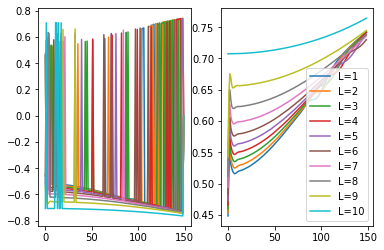

In [5]:

ax=plt.subplot2grid((1,2),(0,0))
for k in range(indL):
    ax.plot(bs[k,:,100])
ax=plt.subplot2grid((1,2),(0,1))
for k in range(indL):
    ax.plot(np.abs(bs[k,:,100])[:-1], label="L={}".format(k+1))
ax.legend()

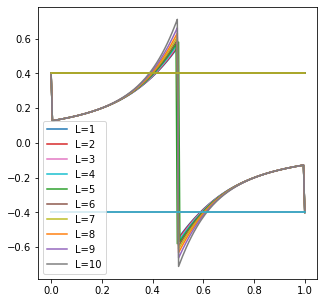

In [6]:
inda = np.argmin(np.abs(amps - 0.4))

plt.figure(figsize=(5,5))
for k in range(indL):
    plt.plot(np.linspace(0,1,200),bs[k,inda,:], label="L={}".format(k+1))
    plt.plot(np.linspace(0,1,200), [amps[inda]]*np.ones(200))
    plt.plot(np.linspace(0,1,200), [-amps[inda]]*np.ones(200))
plt.legend(loc=3, )

What's the meaning here??

$P_S = \eta e^{- |\alpha + \beta|^2} + (1-\eta) e^{-|- \alpha + \beta|^2} $.

Note that each term is a gaussian, each maximized when $\beta = \pm \alpha$.

If $\eta < 0.5$, the term in the right will weight more, thus we seek $\beta$ s.t. $\alpha - \beta \sim 0$ (thus, $\beta$ will be positive in that region). In the remaining region is the other way around.

In [70]:
from scipy.interpolate import Rbf, interp1d
from main import Postirior, Prob_Outcome

In [6]:
etas_min = np.linspace(0,.5,100)
amps = np.arange(0.01,1.501,.01)
whole_etas = np.concatenate([etas_min, (1-etas_min)[::-1]])

Text(0.5, 0, 'L')

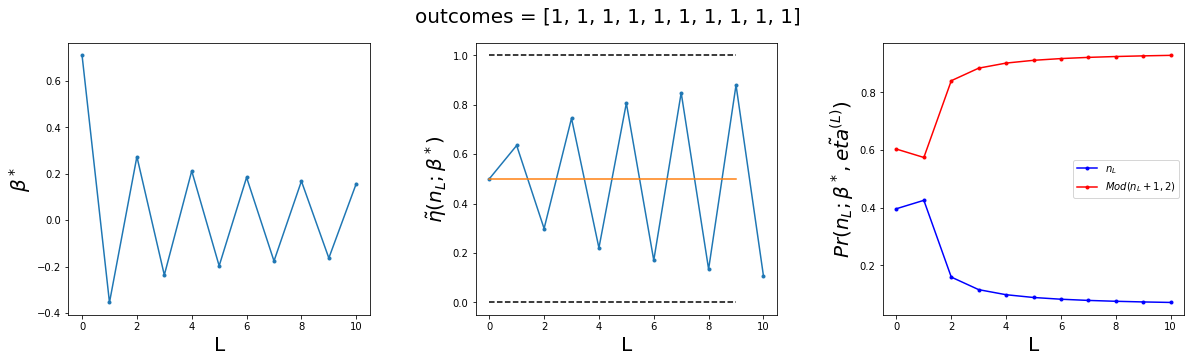

In [102]:
prior = 0.5
priors = [prior]
inda = np.argmin(np.abs(amps-0.4))
indp = np.argmin(np.abs(whole_etas - 0.5))

amp = amps[inda]
beta = bs[layer, inda, indp]
betas = [beta]
outcome_probs = [Prob_Outcome(outcomes[0], amp/np.sqrt(bs.shape[0]), beta, prior)]
outcome_probs_opposite = [Prob_Outcome((outcomes[0]+1)%2, amp/np.sqrt(bs.shape[0]), beta, prior)]
outcomes = [1]*bs.shape[0]

for ind,ell in enumerate(range(bs.shape[0])[::-1]):

    actions.append(beta)
    out = outcomes[ind]
    model_betas = interp1d(whole_etas, bs[layer-1, inda,:])#,  smooth=1e-1)#,ep=1e-12)
    prior = Postirior(out, amp/np.sqrt(L), beta, prior)
    outcome_probs.append( Prob_Outcome(outcomes[0], amp/np.sqrt(bs.shape[0]), beta, prior))
    outcome_probs_opposite.append( Prob_Outcome((outcomes[0]+1)%2, amp/np.sqrt(bs.shape[0]), beta, prior))
    
    beta = model_betas(prior)
    betas.append(beta)
    priors.append(prior)
    
fig = plt.figure(figsize=(20,5))
plt.suptitle("outcomes = "+str(outcomes), size=20)
fig.tight_layout()
ax1, ax2, ax3 = [plt.subplot2grid((1,3),(0,k)) for k in range(3)]

plt.subplots_adjust(wspace=0.35)
ax1.plot(betas,'.-')
ax2.plot(priors, '.-')
ax2.plot([.5]*bs.shape[0])
ax2.plot([0]*bs.shape[0],'--', color="black")
ax2.plot([1]*bs.shape[0],'--', color="black")         
ax3.plot(outcome_probs, '.-', color="blue",label=r'$n_L$')
ax3.plot(outcome_probs_opposite, '.-', color="red", label=r'$Mod(n_L +1,2)$')
ax3.legend()

ax1.set_ylabel(r'$\beta^*$',size=20)
ax1.set_xlabel("L",size=20)

ax2.set_ylabel(r'$\tilde{\eta}(n_L; \beta^*)$',size=20)
ax2.set_xlabel("L",size=20)

ax3.set_ylabel(r'$Pr(n_L; \beta^*, \tilde{eta}^{(L)})$',size=20)
ax3.set_xlabel("L",size=20)



Text(0.5, 0, 'L')

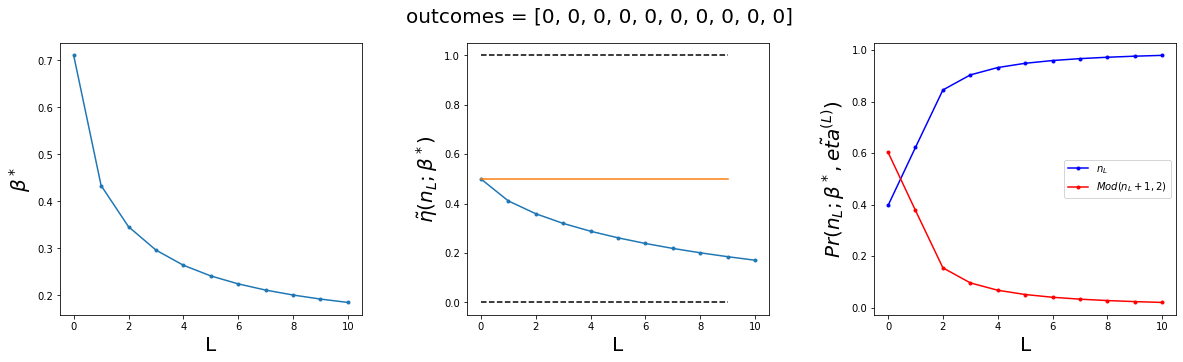

In [103]:
prior = 0.5
priors = [prior]
inda = np.argmin(np.abs(amps-0.4))
indp = np.argmin(np.abs(whole_etas - 0.5))

amp = amps[inda]
beta = bs[layer, inda, indp]
betas = [beta]
outcome_probs = [Prob_Outcome(outcomes[0], amp/np.sqrt(bs.shape[0]), beta, prior)]
outcome_probs_opposite = [Prob_Outcome((outcomes[0]+1)%2, amp/np.sqrt(bs.shape[0]), beta, prior)]
outcomes = [0]*bs.shape[0]

for ind,ell in enumerate(range(bs.shape[0])[::-1]):

    actions.append(beta)
    out = outcomes[ind]
    model_betas = interp1d(whole_etas, bs[layer-1, inda,:])#,  smooth=1e-1)#,ep=1e-12)
    prior = Postirior(out, amp/np.sqrt(L), beta, prior)
    outcome_probs.append( Prob_Outcome(outcomes[0], amp/np.sqrt(bs.shape[0]), beta, prior))
    outcome_probs_opposite.append( Prob_Outcome((outcomes[0]+1)%2, amp/np.sqrt(bs.shape[0]), beta, prior))
    
    beta = model_betas(prior)
    betas.append(beta)
    priors.append(prior)
    
fig = plt.figure(figsize=(20,5))
plt.suptitle("outcomes = "+str(outcomes), size=20)
fig.tight_layout()
ax1, ax2, ax3 = [plt.subplot2grid((1,3),(0,k)) for k in range(3)]

plt.subplots_adjust(wspace=0.35)
ax1.plot(betas,'.-')
ax2.plot(priors, '.-')
ax2.plot([.5]*bs.shape[0])
ax2.plot([0]*bs.shape[0],'--', color="black")
ax2.plot([1]*bs.shape[0],'--', color="black")         
ax3.plot(outcome_probs, '.-', color="blue",label=r'$n_L$')
ax3.plot(outcome_probs_opposite, '.-', color="red", label=r'$Mod(n_L +1,2)$')
ax3.legend()

ax1.set_ylabel(r'$\beta^*$',size=20)
ax1.set_xlabel("L",size=20)

ax2.set_ylabel(r'$\tilde{\eta}(n_L; \beta^*)$',size=20)
ax2.set_xlabel("L",size=20)

ax3.set_ylabel(r'$Pr(n_L; \beta^*, \tilde{eta}^{(L)})$',size=20)
ax3.set_xlabel("L",size=20)



Text(0.5, 0, 'L')

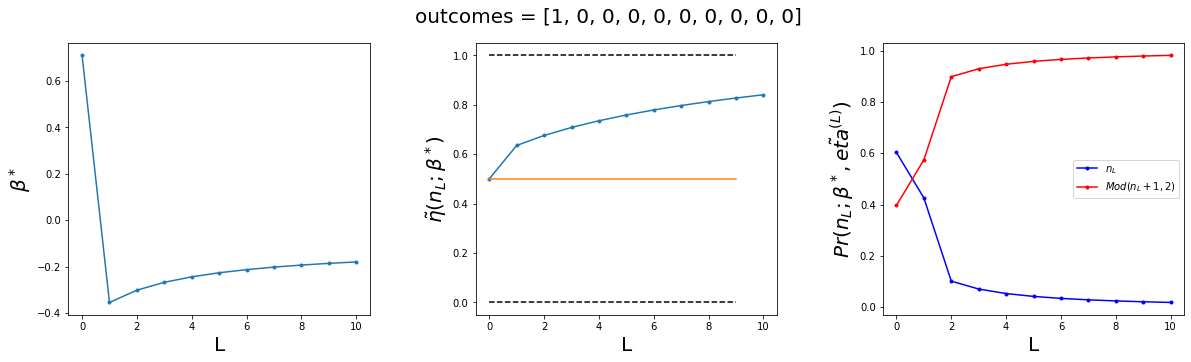

In [104]:
prior = 0.5
priors = [prior]
inda = np.argmin(np.abs(amps-0.4))
indp = np.argmin(np.abs(whole_etas - 0.5))

amp = amps[inda]
beta = bs[layer, inda, indp]
betas = [beta]
outcome_probs = [Prob_Outcome(outcomes[0], amp/np.sqrt(bs.shape[0]), beta, prior)]
outcome_probs_opposite = [Prob_Outcome((outcomes[0]+1)%2, amp/np.sqrt(bs.shape[0]), beta, prior)]
outcomes = [1] + [0]*(bs.shape[0]-1)

for ind,ell in enumerate(range(bs.shape[0])[::-1]):

    actions.append(beta)
    out = outcomes[ind]
    model_betas = interp1d(whole_etas, bs[layer-1, inda,:])#,  smooth=1e-1)#,ep=1e-12)
    prior = Postirior(out, amp/np.sqrt(L), beta, prior)
    outcome_probs.append( Prob_Outcome(outcomes[0], amp/np.sqrt(bs.shape[0]), beta, prior))
    outcome_probs_opposite.append( Prob_Outcome((outcomes[0]+1)%2, amp/np.sqrt(bs.shape[0]), beta, prior))
    
    beta = model_betas(prior)
    betas.append(beta)
    priors.append(prior)
    
fig = plt.figure(figsize=(20,5))
plt.suptitle("outcomes = "+str(outcomes), size=20)
fig.tight_layout()
ax1, ax2, ax3 = [plt.subplot2grid((1,3),(0,k)) for k in range(3)]

plt.subplots_adjust(wspace=0.35)
ax1.plot(betas,'.-')
ax2.plot(priors, '.-')
ax2.plot([.5]*bs.shape[0])
ax2.plot([0]*bs.shape[0],'--', color="black")
ax2.plot([1]*bs.shape[0],'--', color="black")         
ax3.plot(outcome_probs, '.-', color="blue",label=r'$n_L$')
ax3.plot(outcome_probs_opposite, '.-', color="red", label=r'$Mod(n_L +1,2)$')
ax3.legend()

ax1.set_ylabel(r'$\beta^*$',size=20)
ax1.set_xlabel("L",size=20)

ax2.set_ylabel(r'$\tilde{\eta}(n_L; \beta^*)$',size=20)
ax2.set_xlabel("L",size=20)

ax3.set_ylabel(r'$Pr(n_L; \beta^*, \tilde{eta}^{(L)})$',size=20)
ax3.set_xlabel("L",size=20)



Text(0, 0.5, '$\\beta^*$')

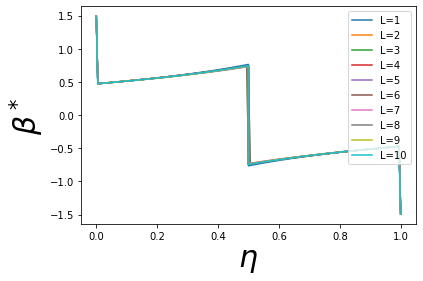

In [16]:
netas = np.linspace(0,1,1000)
for layer in range(bs.shape[0]):
    plt.plot(whole_etas,bs[layer-1, inda,:], label="L={}".format(layer+1))
plt.legend()
plt.xlabel(r'$\eta$',size=30)
plt.ylabel(r'$\beta^*$',size=30)

interpolation two dimensions...

In [17]:
tot_L = 10
ells = range(1,tot_L)
ps = np.zeros((tot_L, len(amps)))
for indL in tqdm(ells):
    for inda, a in enumerate(amps):
        ps[indL, inda] = np.load("/data/uab-giq/scratch/matias/dynamo/{}/{}/Ps.npy".format(indL,np.round(a,3)))[0, 100]


100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


In [ ]:
from scipy.interpolate import Rbf, RectBivariateSpline, interp2d, griddata


ets, als = np.meshgrid(whole_etas, amps)
convert_to = lambda x: np.squeeze(np.reshape(x,[-1,1]))
modelito = Rbf(convert_to(ets), convert_to(als), convert_to(bs[-1,:,:]), ep=1e-12)

z = np.random.randn(10,10)
x=np.linspace(0,1,10)
y = np.linspace(0,1,10)
x1, y1 = np.meshgrid(x,y)
x1 = np.squeeze(np.reshape(x1,[-1,1]))
y1 = np.squeeze(np.reshape(y1,[-1,1]))
modelito = interp2d(x1,y1,np.squeeze(np.reshape(z,[-1,1])))

plt.imshow(modelito(x,y)-z)

In [128]:
etas_min = np.linspace(0,.5,100)
amps = np.arange(0.01,1.501,.01)
whole_etas = np.concatenate([etas_min, (1-etas_min)[::-1]])

In [129]:
ets, als = np.meshgrid(whole_etas, amps)
convert_to = lambda x: np.squeeze(np.reshape(x,[-1,1]))
modelito = interp2d(convert_to(ets), convert_to(als), convert_to(bs[-1,:,:]))

/nfs/pic.es/user/m/mbilkis/qenv_bilkis/lib64/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=1,1 nx,ny=82,183 m=30000 fp=1232825929267450.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [59]:
def hel(alpha):
    return (1+np.sqrt(1-np.exp(-4*alpha**2)))/2

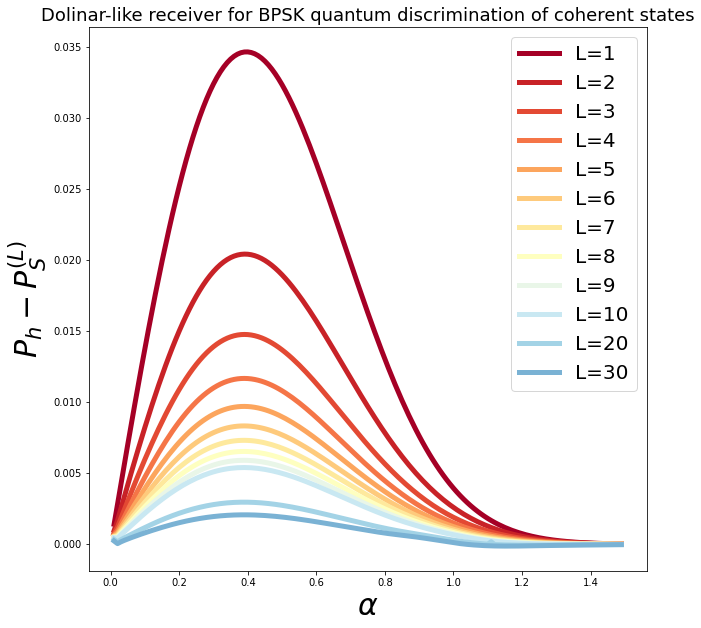

In [60]:
name = "RdYlBu"
cc=cm.get_cmap(name)
plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
lw=5
colors = {0:"red",1:"blue",2:"pink",3:"black"}
ind=0
tot=14
for layer in range(1,10):
    ax1.plot(amps,hel(amps) - 1 + ps[layer], label="L="+str(layer), linewidth=lw, color=cc(ind/tot))# color=colors[layer])
    ind+=1
for indl, lay in enumerate([10,20,30]):
    ax1.plot(amps, hel(amps)-1+pss[indl], label="L="+str(lay),linewidth=lw, color=cc(ind/tot))
    ind+=1
#plt.plot(amps,1-hel(amps),'--')
ax1.legend(prop={"size":20})
ax1.set_xlabel(r'$\alpha$',size=30)
ax1.set_ylabel(r'$P_h - P_S^{(L)}$',size=30)
ax1.set_title("Dolinar-like receiver for BPSK quantum discrimination of coherent states",size=18)

plt.savefig("figures_readme/bpsk_noiseless.png")